In [1]:
!pip install quandl
!pip install tabulate

In [2]:
import quandl
quandl.ApiConfig.api_key = "icjEB8FYLh6QyycLs6Xf"

In [3]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# We will use the Quandl service to get the data for six months for AAPL
start = pd.to_datetime('2017-04-01')
end = pd.to_datetime('2017-10-01')
stock_price_df = quandl.get('WIKI/AAPL', start_date=start, end_date=end)

# Print some general information about the results from Quandl
stock_price_df.info()

# Print the last 10 items to see what we got
print(tabulate(stock_price_df[['Open', 'Close', 'High', 'Low', 'Volume']].tail(10), headers='keys', tablefmt='psql'))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2017-04-03 to 2017-09-29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         125 non-null    float64
 1   High         125 non-null    float64
 2   Low          125 non-null    float64
 3   Close        125 non-null    float64
 4   Volume       125 non-null    float64
 5   Ex-Dividend  125 non-null    float64
 6   Split Ratio  125 non-null    float64
 7   Adj. Open    125 non-null    float64
 8   Adj. High    125 non-null    float64
 9   Adj. Low     125 non-null    float64
 10  Adj. Close   125 non-null    float64
 11  Adj. Volume  125 non-null    float64
dtypes: float64(12)
memory usage: 12.7 KB
+---------------------+--------+---------+---------+---------+-------------+
| Date                |   Open |   Close |    High |     Low |      Volume |
|---------------------+--------+---------+---------+---------+-------------|
| 2017-09-18 00

In [ ]:
# Sometimes the API may not work, then we'll need work with CSV files
# stock_price_df = pd.read_csv('WIKI_PRICES_AAPL.csv', sep=',')
# stock_price_df.index = pd.to_datetime(stock_price_df.pop('date'))
# stock_price_df.info()

In [6]:
# Create a plot function
%matplotlib inline
def plot_series(df, columns, last_n, title):
    plot_df = df[columns].tail(last_n)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    plot_df.plot(ax=ax, figsize=(20,8))

In [7]:
# Moving Average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(min_periods=1, center=True, window=n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

MOVING AVERAGE
+---------------------+---------+---------+
| Date                |   Close |    MA_7 |
|---------------------+---------+---------|
| 2017-09-18 00:00:00 |  158.67 | 157.81  |
| 2017-09-19 00:00:00 |  158.73 | 156.701 |
| 2017-09-20 00:00:00 |  156.07 | 155.597 |
| 2017-09-21 00:00:00 |  153.39 | 154.634 |
| 2017-09-22 00:00:00 |  151.89 | 154     |
| 2017-09-25 00:00:00 |  150.55 | 153.221 |
| 2017-09-26 00:00:00 |  153.14 | 152.943 |
| 2017-09-27 00:00:00 |  154.23 | 152.868 |
| 2017-09-28 00:00:00 |  153.28 | 153.064 |
| 2017-09-29 00:00:00 |  154.12 | 153.692 |
+---------------------+---------+---------+


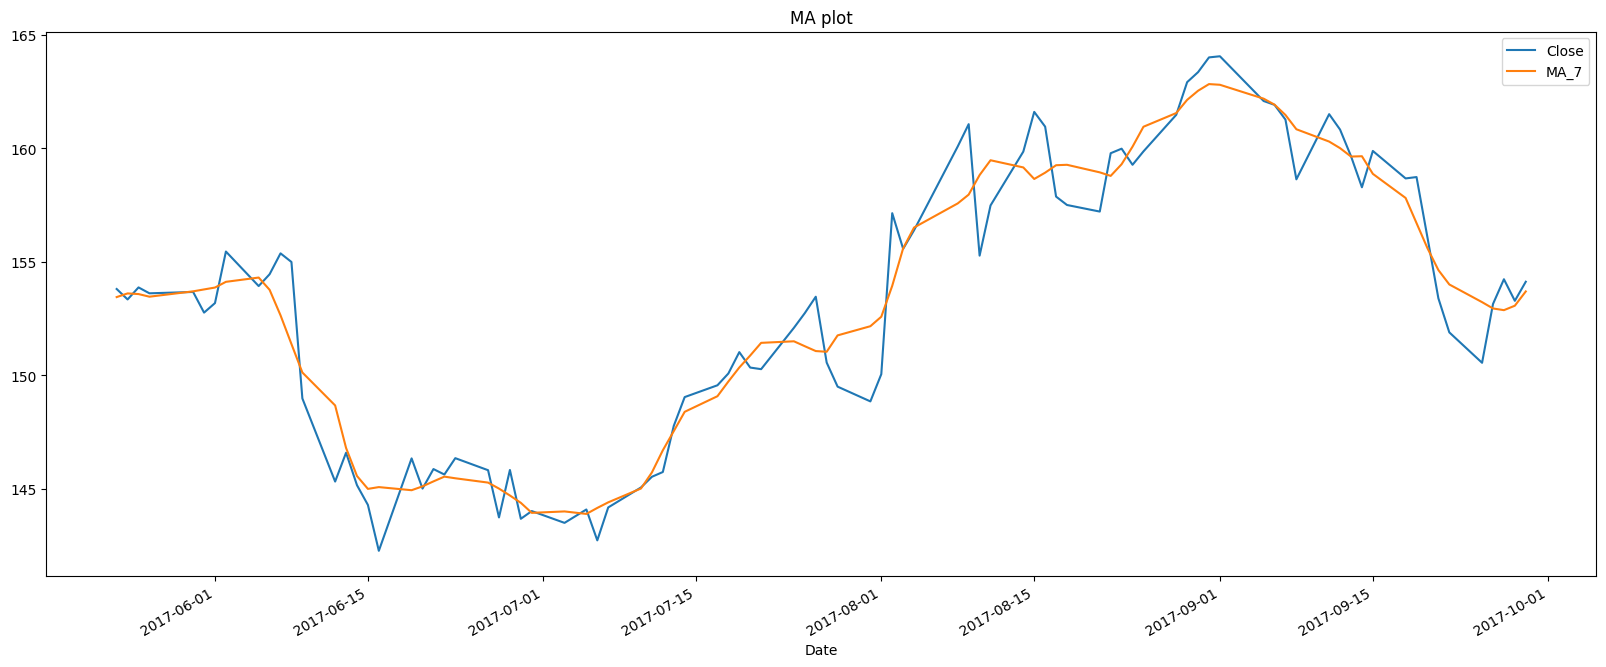

In [9]:
# Printing the Moving Average
print("MOVING AVERAGE")
stock_ma_df = MA(stock_price_df, 7)

# Print the last 10 items
print(tabulate(stock_ma_df[['Close', 'MA_7']].tail(10), headers='keys', tablefmt='psql'))

# Plot the moving averate for the last 90 days
plot_series(stock_ma_df, ['Close', 'MA_7'], 90, 'MA plot')

In [10]:
# Exponential Moving Average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods = 1).mean(), name='EMA_' + str(n))
    df = df.join(EMA)
    return df

EXPONENTIAL MOVING AVERAGE
+---------------------+---------+---------+----------+
| Date                |   Close |    MA_7 |   EMA_14 |
|---------------------+---------+---------+----------|
| 2017-09-18 00:00:00 |  158.67 | 157.81  |  160.108 |
| 2017-09-19 00:00:00 |  158.73 | 156.701 |  159.924 |
| 2017-09-20 00:00:00 |  156.07 | 155.597 |  159.41  |
| 2017-09-21 00:00:00 |  153.39 | 154.634 |  158.608 |
| 2017-09-22 00:00:00 |  151.89 | 154     |  157.712 |
| 2017-09-25 00:00:00 |  150.55 | 153.221 |  156.757 |
| 2017-09-26 00:00:00 |  153.14 | 152.943 |  156.275 |
| 2017-09-27 00:00:00 |  154.23 | 152.868 |  156.002 |
| 2017-09-28 00:00:00 |  153.28 | 153.064 |  155.639 |
| 2017-09-29 00:00:00 |  154.12 | 153.692 |  155.437 |
+---------------------+---------+---------+----------+


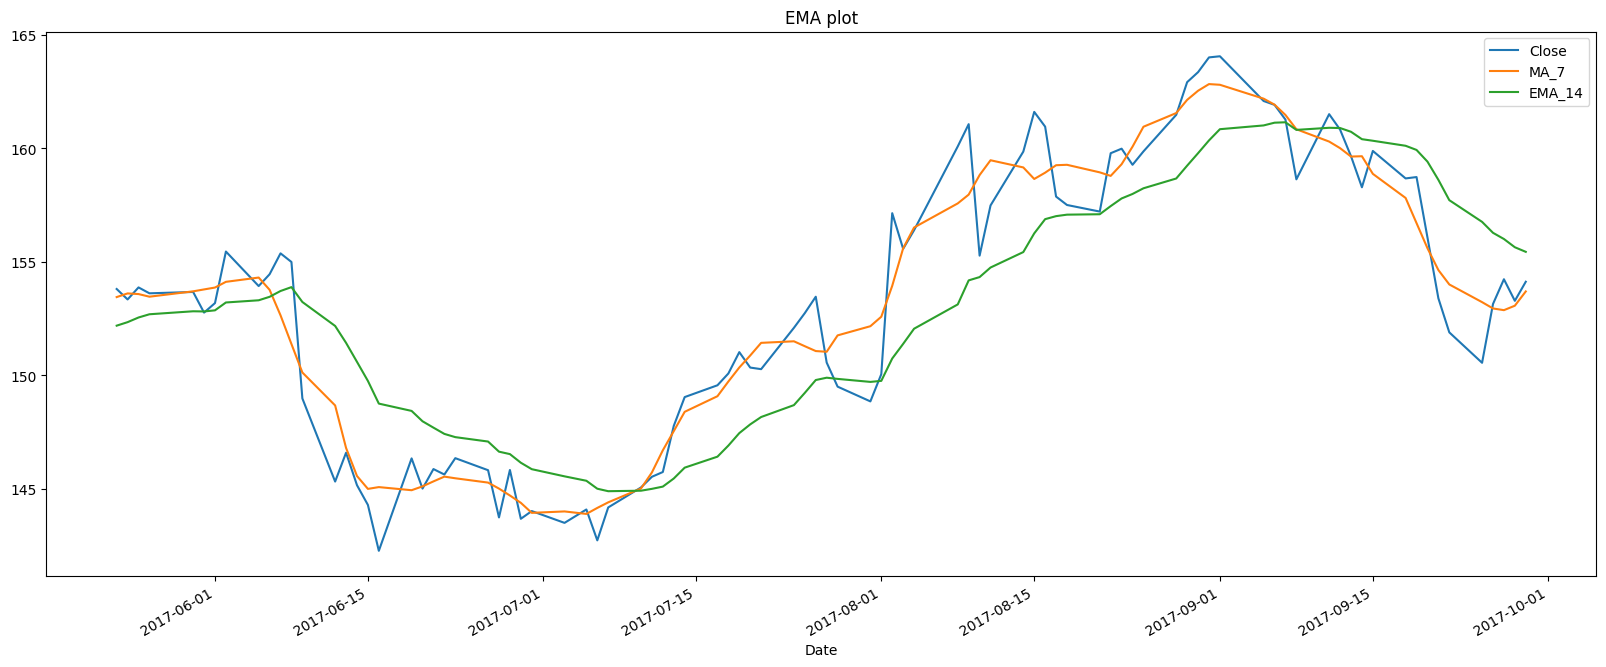

In [12]:
# Printing the Exponential Moving Average
print("EXPONENTIAL MOVING AVERAGE")
stock_ema_df = EMA(stock_ma_df,14)

# Print the last 10 items
print(tabulate(stock_ema_df[['Close', 'MA_7', 'EMA_14']].tail(10), headers='keys', tablefmt='psql'))

# Plot the moving averate for the last 90 days
plot_series(stock_ema_df, ['Close', 'MA_7', 'EMA_14'], 90, 'EMA plot')

In [13]:
# Momentum
def MOM(df, n):
    M = pd.Series(df['Close'].diff(n), name = 'MOM_' + str(n))
    df = df.join(M)
    return df

MOMENTUM
+---------------------+---------+---------+
| Date                |   Close |   MOM_7 |
|---------------------+---------+---------|
| 2017-09-18 00:00:00 |  158.67 |   -2.59 |
| 2017-09-19 00:00:00 |  158.73 |    0.1  |
| 2017-09-20 00:00:00 |  156.07 |   -5.43 |
| 2017-09-21 00:00:00 |  153.39 |   -7.43 |
| 2017-09-22 00:00:00 |  151.89 |   -7.76 |
| 2017-09-25 00:00:00 |  150.55 |   -7.73 |
| 2017-09-26 00:00:00 |  153.14 |   -6.74 |
| 2017-09-27 00:00:00 |  154.23 |   -4.44 |
| 2017-09-28 00:00:00 |  153.28 |   -5.45 |
| 2017-09-29 00:00:00 |  154.12 |   -1.95 |
+---------------------+---------+---------+


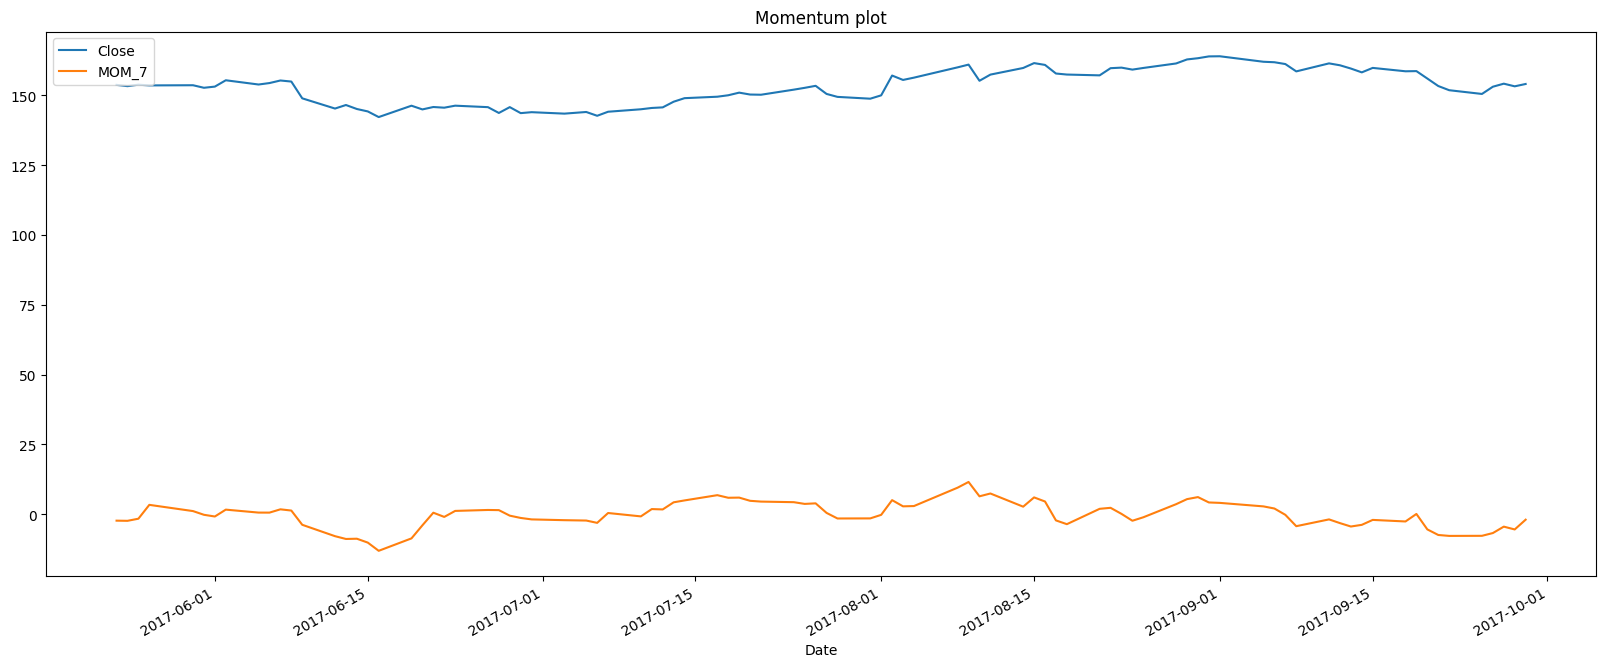

In [15]:
# Printing the Momentum Indicator
print("MOMENTUM")
stock_mom_df = MOM(stock_ema_df, 7)
# print stock_ema_df.info()
# print stock_ema_df.head()

print(tabulate(stock_mom_df[['Close', 'MOM_7']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_mom_df, ['Close', 'MOM_7'], 90, 'Momentum plot')

In [16]:
# Rate of Change
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    return df

RATE OF CHANGE
+---------------------+---------+--------------+
| Date                |   Close |        ROC_7 |
|---------------------+---------+--------------|
| 2017-09-18 00:00:00 |  158.67 |  0.000252159 |
| 2017-09-19 00:00:00 |  158.73 | -0.0171517   |
| 2017-09-20 00:00:00 |  156.07 | -0.0295361   |
| 2017-09-21 00:00:00 |  153.39 | -0.0392108   |
| 2017-09-22 00:00:00 |  151.89 | -0.0403715   |
| 2017-09-25 00:00:00 |  150.55 | -0.0583563   |
| 2017-09-26 00:00:00 |  153.14 | -0.0348522   |
| 2017-09-27 00:00:00 |  154.23 | -0.02835     |
| 2017-09-28 00:00:00 |  153.28 | -0.0178766   |
| 2017-09-29 00:00:00 |  154.12 |  0.00475911  |
+---------------------+---------+--------------+


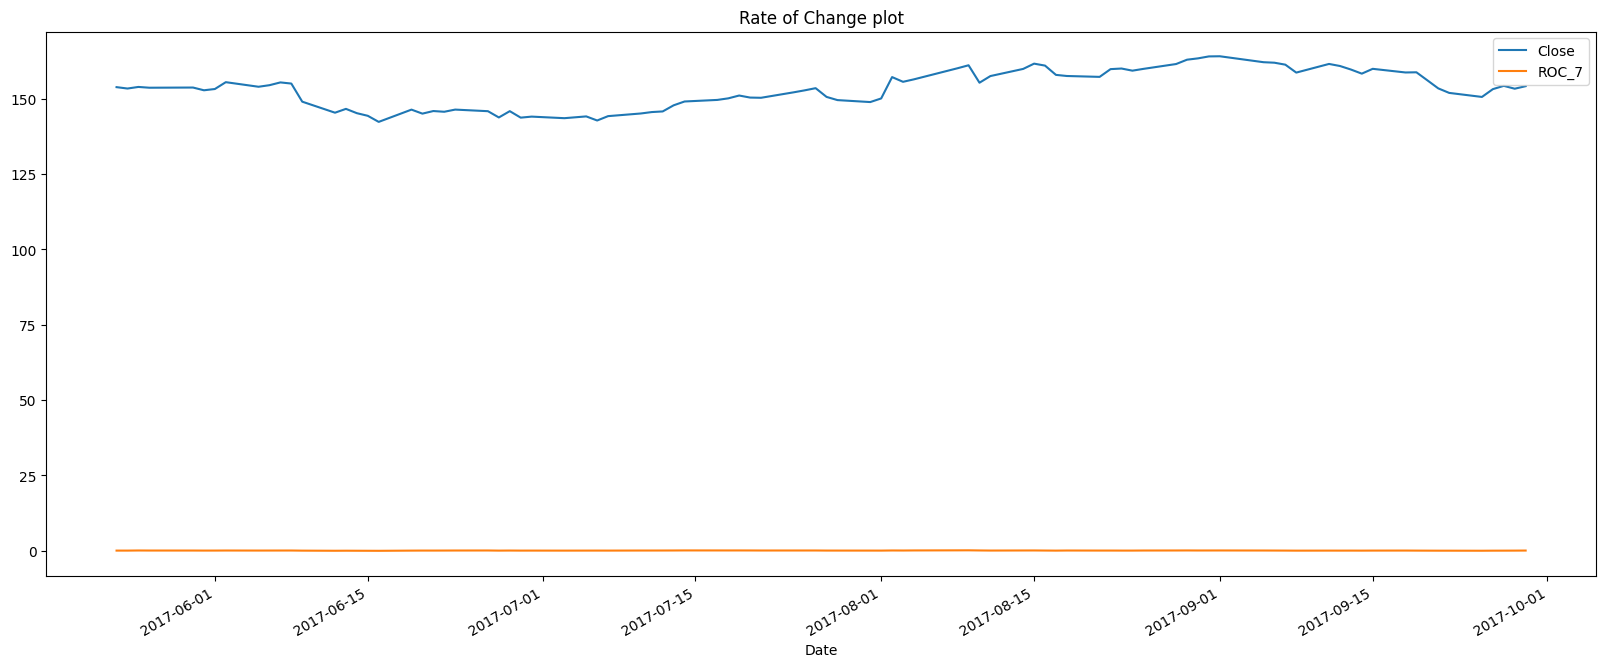

In [17]:
# Printing the ROC Indicator
print("RATE OF CHANGE")
stock_roc_df = ROC(stock_mom_df, 7)
# print stock_ema_df.info()
# print stock_ema_df.head()

print(tabulate(stock_roc_df[['Close', 'ROC_7']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_roc_df, ['Close', 'ROC_7'], 90, 'Rate of Change plot')

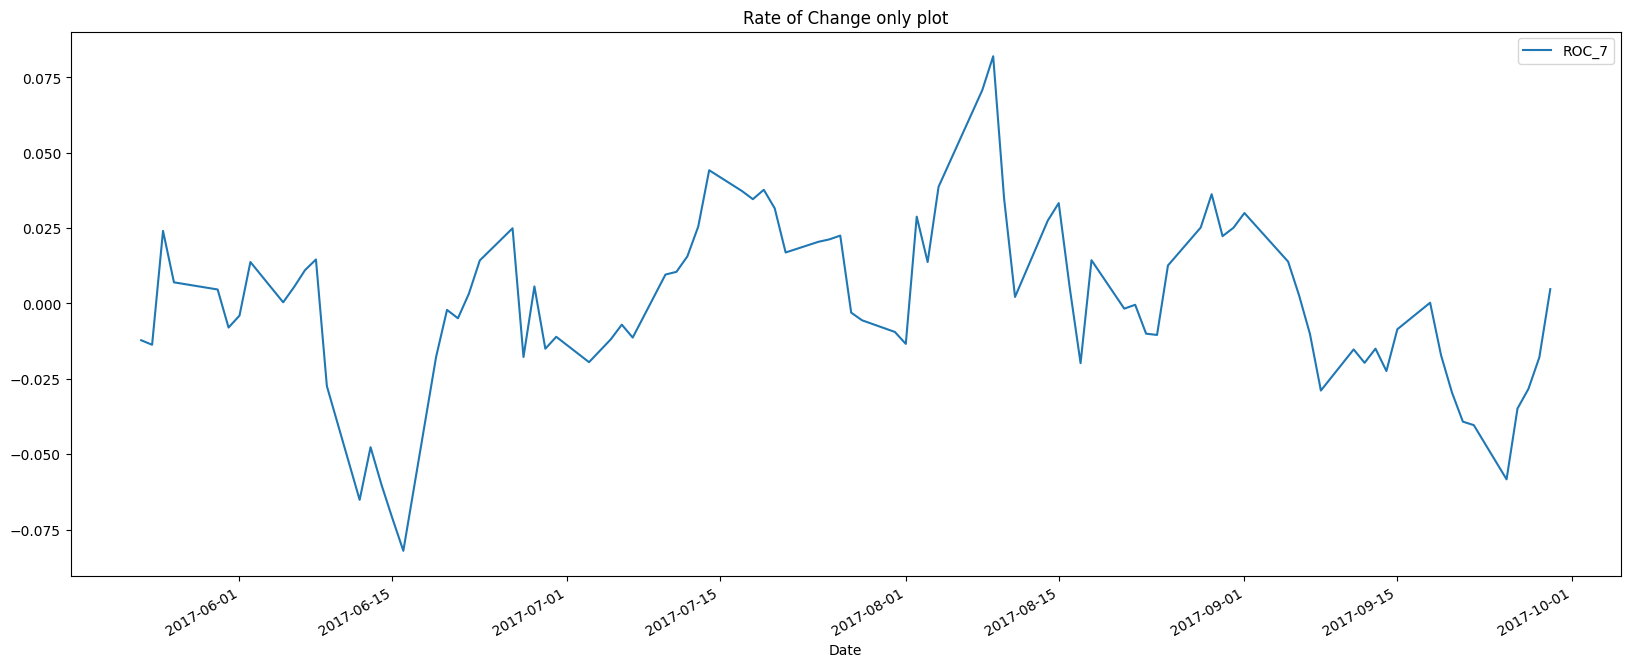

In [18]:
#Plot of the Rate of Change
plot_series(stock_roc_df, ['ROC_7'], 90, 'Rate of Change only plot')

In [19]:
# Implementation of the Moving Average Convergence Divergence (MACD) function
def MACD(df, n_fast, n_slow):
    EMAfast = pd.Series(df['Close'].ewm(span=n_fast, min_periods=1).mean(), name='EMAfast')
    EMAslow = pd.Series(df['Close'].ewm(span=n_slow, min_periods=1).mean(), name='EMAslow')

    name = 'MACD_' + str(n_fast) + '_' + str(n_slow)
    MACD = pd.Series(EMAfast - EMAslow, name = name)
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods = 1).mean(),
                         name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))

    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df

MACD
+---------------------+---------+--------------+------------------+------------------+
| Date                |   Close |   MACD_12_26 |   MACDsign_12_26 |   MACDdiff_12_26 |
|---------------------+---------+--------------+------------------+------------------|
| 2017-09-18 00:00:00 |  158.67 |     0.77742  |         1.48938  |        -0.711956 |
| 2017-09-19 00:00:00 |  158.73 |     0.611024 |         1.31371  |        -0.702681 |
| 2017-09-20 00:00:00 |  156.07 |     0.261523 |         1.10327  |        -0.841746 |
| 2017-09-21 00:00:00 |  153.39 |    -0.229051 |         0.836805 |        -1.06586  |
| 2017-09-22 00:00:00 |  151.89 |    -0.730441 |         0.523356 |        -1.2538   |
| 2017-09-25 00:00:00 |  150.55 |    -1.22183  |         0.174319 |        -1.39615  |
| 2017-09-26 00:00:00 |  153.14 |    -1.3863   |        -0.137805 |        -1.2485   |
| 2017-09-27 00:00:00 |  154.23 |    -1.41242  |        -0.392727 |        -1.01969  |
| 2017-09-28 00:00:00 |  153.28 |    -

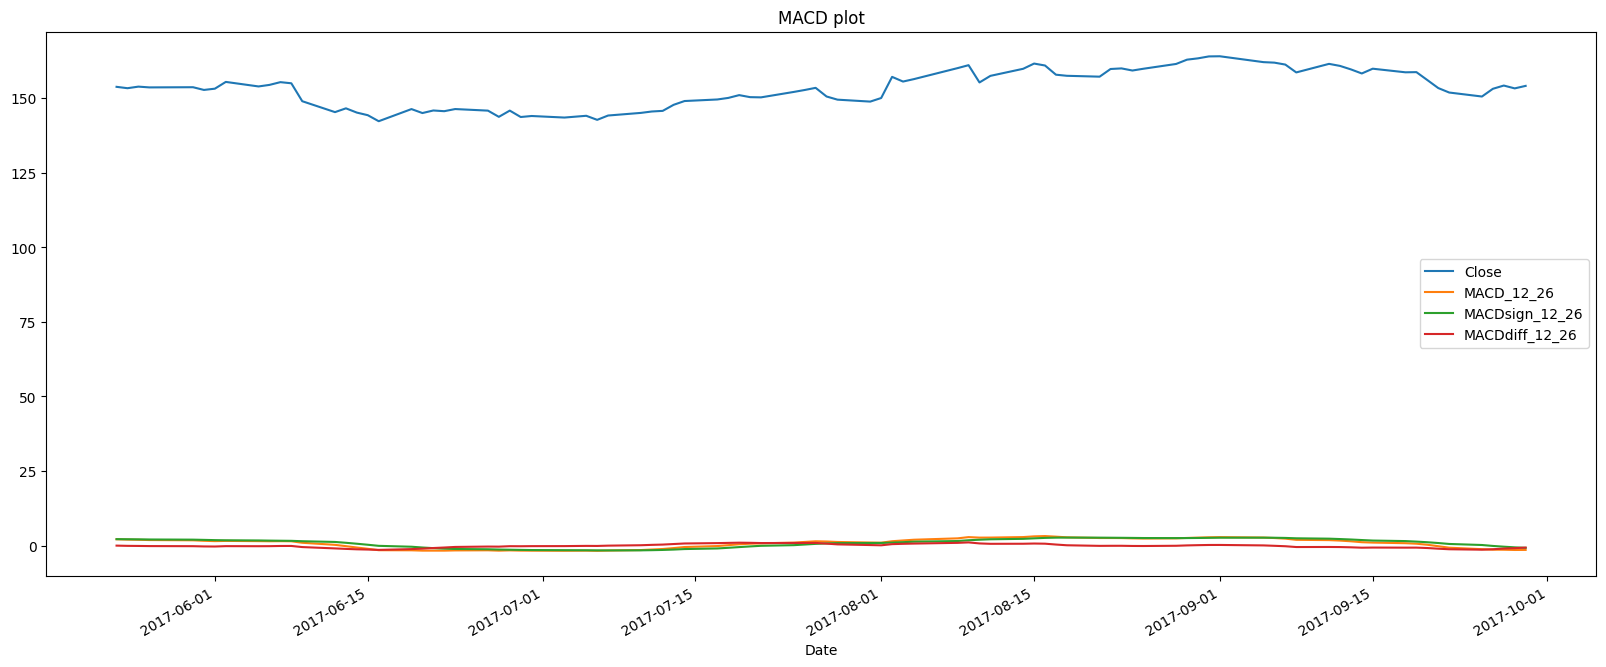

In [20]:
# Printing the Exponential Moving Average
print("MACD")
stock_macd_df = MACD(stock_ema_df,12,26)
# print stock_macd_df.info()
# print stock_macd_df.head()

print(tabulate(stock_macd_df[['Close', 'MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_macd_df, ['Close', 'MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26'], 90, 'MACD plot')

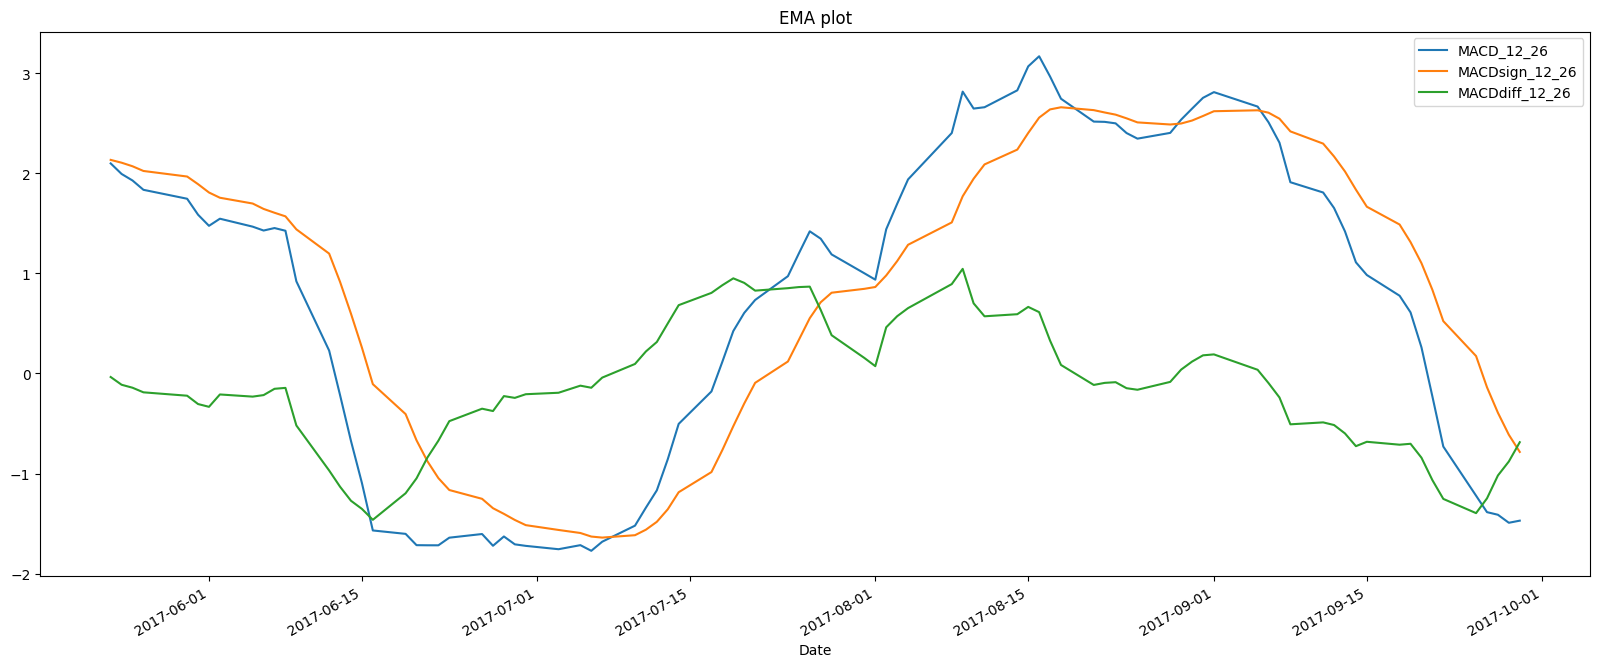

In [21]:
# Let's look at the MACD measures closely
plot_series(stock_macd_df, ['MACD_12_26', 'MACDsign_12_26', 'MACDdiff_12_26'], 90, 'EMA plot')

In [22]:
# Bollinger Bands
def BBANDS(df, n):
    MA = pd.Series(df['Close'].rolling(min_periods=1, center=False, window=n).mean(), name = 'MA1_' + str(n))
    MSD = pd.Series(df['Close'].rolling(min_periods=1, center=False, window=n).mean(), name = 'MSD_' + str(n))
    b1 = 4 * MSD / MA
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))
    df = df.join(B1)
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

BOLLINGER BANDS
+---------------------+---------+-----------------+------------------+
| Date                |   Close |   BollingerB_21 |   Bollinger%b_21 |
|---------------------+---------+-----------------+------------------|
| 2017-09-18 00:00:00 |  158.67 |               4 |         0.497035 |
| 2017-09-19 00:00:00 |  158.73 |               4 |         0.497038 |
| 2017-09-20 00:00:00 |  156.07 |               4 |         0.492981 |
| 2017-09-21 00:00:00 |  153.39 |               4 |         0.489262 |
| 2017-09-22 00:00:00 |  151.89 |               4 |         0.487493 |
| 2017-09-25 00:00:00 |  150.55 |               4 |         0.486011 |
| 2017-09-26 00:00:00 |  153.14 |               4 |         0.490553 |
| 2017-09-27 00:00:00 |  154.23 |               4 |         0.492792 |
| 2017-09-28 00:00:00 |  153.28 |               4 |         0.491995 |
| 2017-09-29 00:00:00 |  154.12 |               4 |         0.493998 |
+---------------------+---------+-----------------+----------

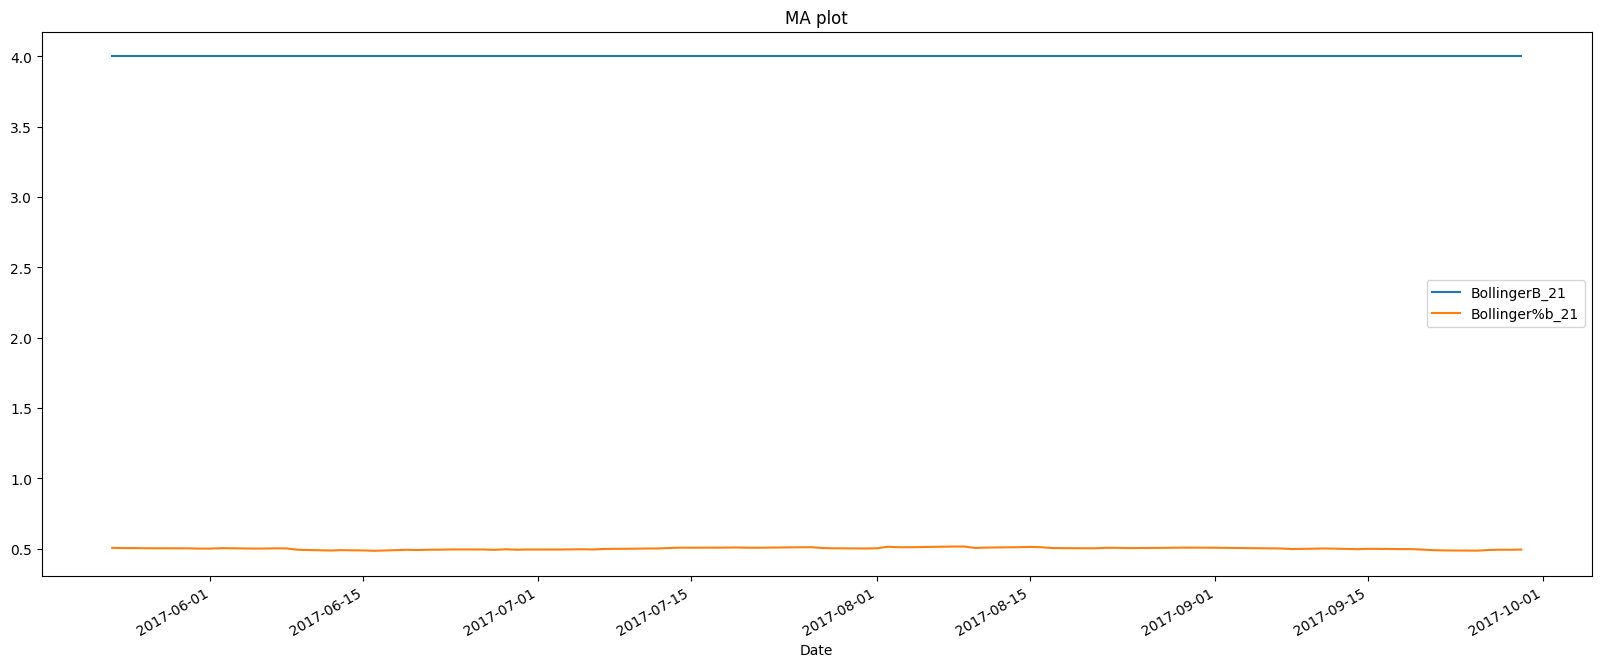

In [23]:
# Printing the Exponential Moving Average
print("BOLLINGER BANDS")
stock_bband_df = BBANDS(stock_ema_df, 21)
# print stock_macd_df.info()
# print stock_macd_df.head()

print(tabulate(stock_bband_df[['Close', 'BollingerB_21', 'Bollinger%b_21']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_bband_df, ['BollingerB_21', 'Bollinger%b_21'], 90, 'MA plot')

In [24]:
# Pivot Points, Supports and Resistances
def PPSR(df):
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)
    R1 = pd.Series(2 * PP - df['Low'])
    S1 = pd.Series(2 * PP - df['High'])
    R2 = pd.Series(PP + df['High'] - df['Low'])
    S2 = pd.Series(PP - df['High'] + df['Low'])
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}
    PSR = pd.DataFrame(psr)
    df = df.join(PSR)
    return df

PIVOT POINTS, SUPPORTS AND RESISTANCES
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+
| Date                |   Close |      PP |      R1 |      S1 |      R2 |      S2 |      R3 |      S3 |
|---------------------+---------+---------+---------+---------+---------+---------+---------+---------|
| 2017-09-18 00:00:00 |  158.67 | 159.055 | 160.115 | 157.61  | 161.56  | 156.55  | 162.62  | 155.105 |
| 2017-09-19 00:00:00 |  158.73 | 158.98  | 159.52  | 158.19  | 160.31  | 157.65  | 160.85  | 156.86  |
| 2017-09-20 00:00:00 |  156.07 | 156.053 | 158.277 | 153.847 | 160.483 | 151.623 | 162.707 | 149.417 |
| 2017-09-21 00:00:00 |  153.39 | 153.98  | 155.21  | 152.16  | 157.03  | 150.93  | 158.26  | 149.11  |
| 2017-09-22 00:00:00 |  151.89 | 151.573 | 152.587 | 150.877 | 153.283 | 149.863 | 154.297 | 149.167 |
| 2017-09-25 00:00:00 |  150.55 | 150.513 | 151.867 | 149.197 | 153.183 | 147.843 | 154.537 | 146.527 |
| 2017-09-26 00:00:00 |  

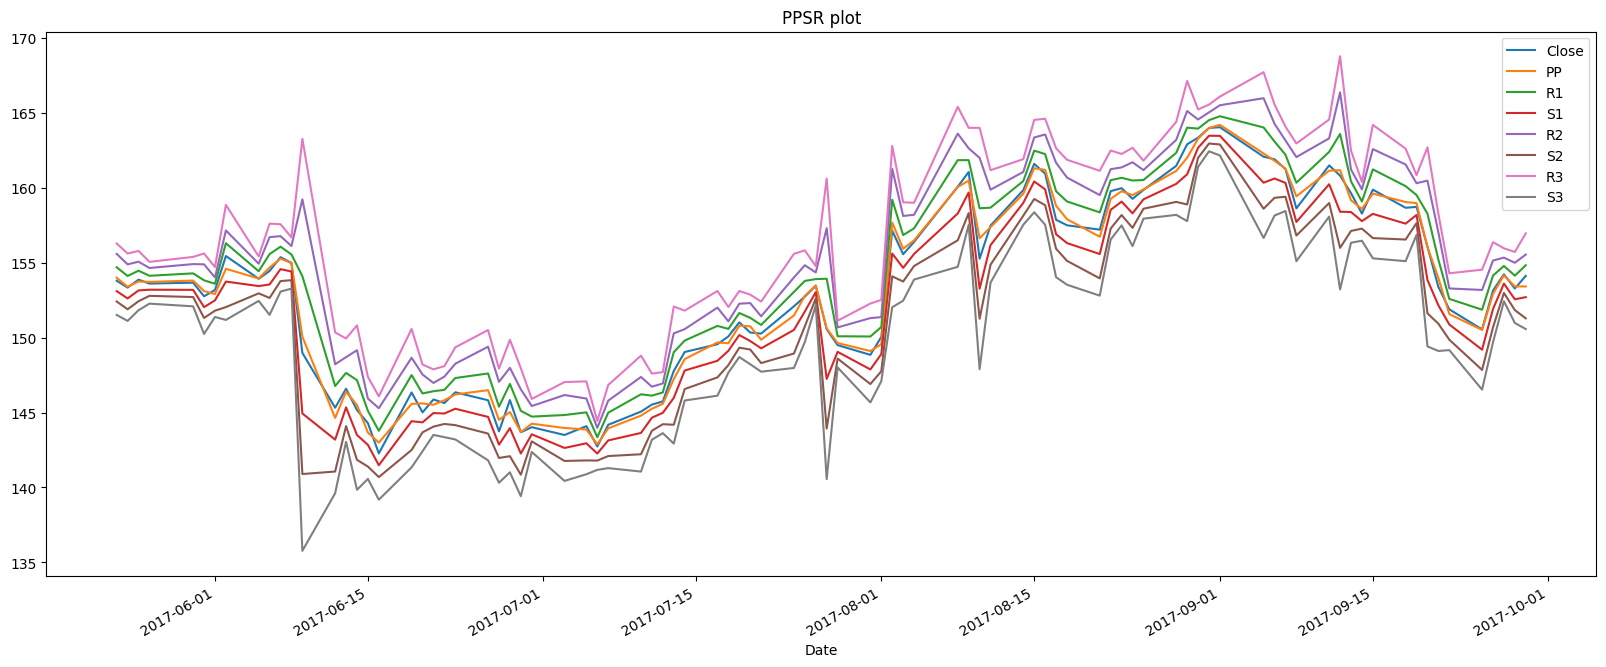

In [25]:
# Printing the Pivot Points, Supports and Resistances
print("PIVOT POINTS, SUPPORTS AND RESISTANCES")
stock_ppsr_df = PPSR(stock_ema_df)
# print stock_ppsr_df.info()
# print stock_ppsr_df.head()

print(tabulate(stock_ppsr_df[['Close', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_ppsr_df, ['Close', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3'], 90, 'PPSR plot')

In [26]:

# Now we are ready to explore two commmon ossicilators
# Stochastic oscillator %K
def STOK(df):
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')
    df = df.join(SOk)
    return df

# Stochastic oscillator %D
def STOD(df, n):
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n-1).mean(), name = 'SO%d_' + str(n))
    df = df.join(SOd)
    return df

STOCHASTIC OSCILLATORS
+---------------------+---------+----------+
| Date                |   Close |     SO%k |
|---------------------+---------+----------|
| 2017-09-18 00:00:00 |  158.67 | 0.269461 |
| 2017-09-19 00:00:00 |  158.73 | 0.218045 |
| 2017-09-20 00:00:00 |  156.07 | 0.505643 |
| 2017-09-21 00:00:00 |  153.39 | 0.209836 |
| 2017-09-22 00:00:00 |  151.89 | 0.777778 |
| 2017-09-25 00:00:00 |  150.55 | 0.520599 |
| 2017-09-26 00:00:00 |  153.14 | 0.650224 |
| 2017-09-27 00:00:00 |  154.23 | 0.585291 |
| 2017-09-28 00:00:00 |  153.28 | 0.367089 |
| 2017-09-29 00:00:00 |  154.12 | 0.995305 |
+---------------------+---------+----------+


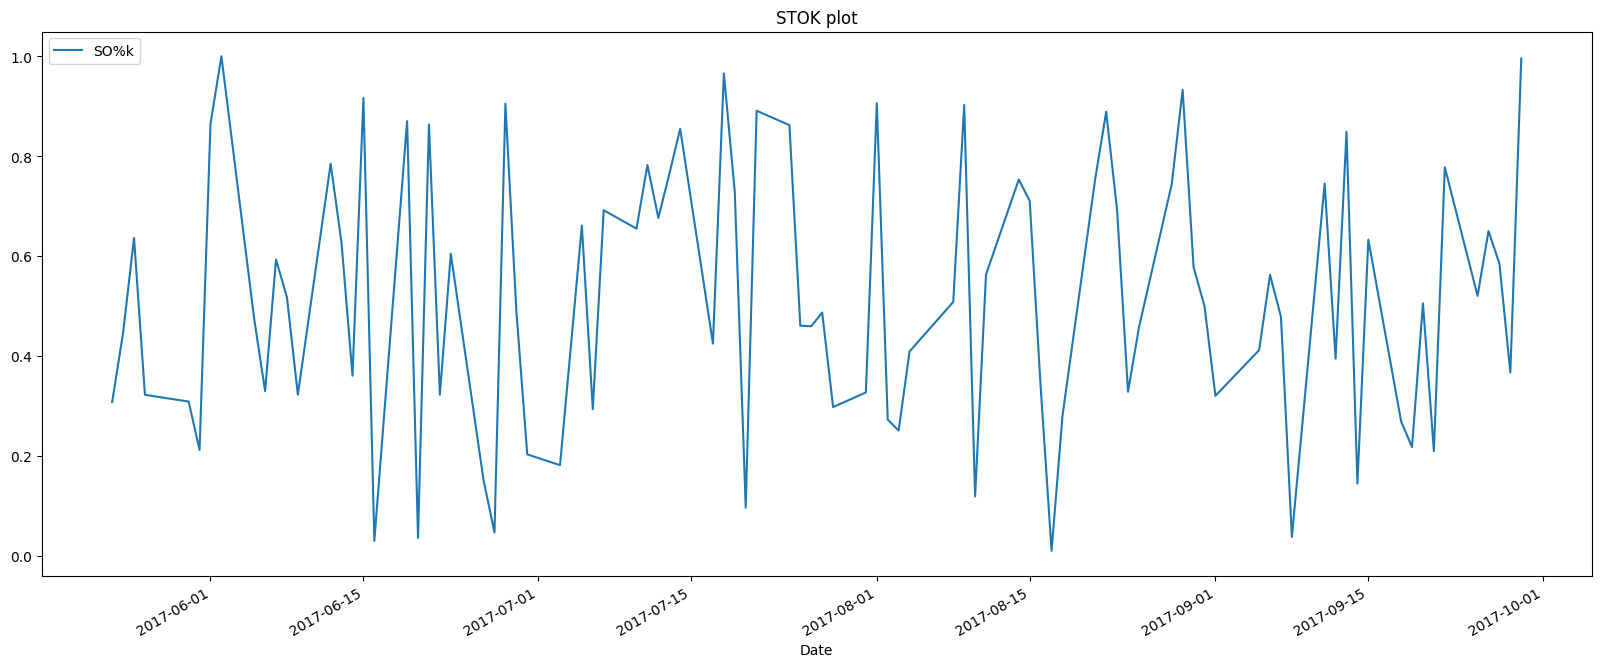

In [27]:
# Printing the Stochastic oscillator %K
print("STOCHASTIC OSCILLATORS")
stock_stok_df = STOK(stock_macd_df)

print(tabulate(stock_stok_df[['Close', 'SO%k']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_stok_df, ['SO%k'], 90, 'STOK plot')

STOCHASTIC OSCILLATORS
+---------------------+---------+----------+
| Date                |   Close |   SO%d_7 |
|---------------------+---------+----------|
| 2017-09-18 00:00:00 |  158.67 | 0.441018 |
| 2017-09-19 00:00:00 |  158.73 | 0.385275 |
| 2017-09-20 00:00:00 |  156.07 | 0.415367 |
| 2017-09-21 00:00:00 |  153.39 | 0.363984 |
| 2017-09-22 00:00:00 |  151.89 | 0.467433 |
| 2017-09-25 00:00:00 |  150.55 | 0.480724 |
| 2017-09-26 00:00:00 |  153.14 | 0.523099 |
| 2017-09-27 00:00:00 |  154.23 | 0.538647 |
| 2017-09-28 00:00:00 |  153.28 | 0.495758 |
| 2017-09-29 00:00:00 |  154.12 | 0.620645 |
+---------------------+---------+----------+


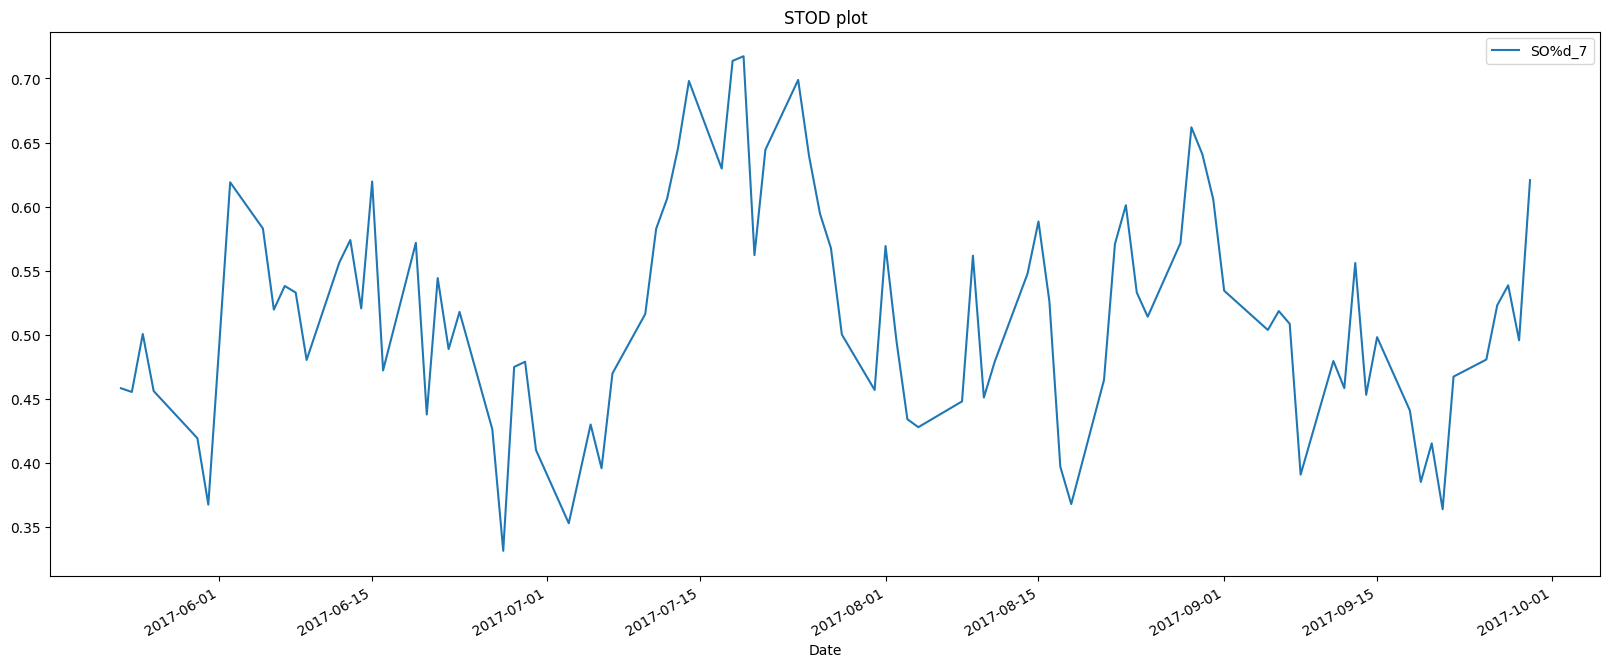

In [28]:
# Printing the Stochastic oscillator %D
print("STOCHASTIC OSCILLATORS")
stock_stod_df = STOD(stock_stok_df, 7)

print(tabulate(stock_stod_df[['Close', 'SO%d_7']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_stod_df, ['SO%d_7'], 90, 'STOD plot')

In [35]:
# Ultimate Oscillator
def ULTOSC(df):
    i = 0
    TR_l = [0]
    BP_l = [0]
    df.reset_index(level=0, drop=True, inplace=True)  # Use drop=True to avoid adding extra 'level_0' column
    while i < len(df) - 1:
        TR = max(df.iloc[i + 1]['High'], df.iloc[i]['Close']) - min(df.iloc[i + 1]['Low'], df.iloc[i]['Close'])
        TR_l.append(TR)
        BP = df.iloc[i + 1]['Close'] - min(df.iloc[i + 1]['Low'], df.iloc[i]['Close'])
        BP_l.append(BP)
        i = i + 1
    UltO = pd.Series((4 * pd.Series(BP_l).rolling(window=7, center=False).sum()
                     / pd.Series(TR_l).rolling(window=7, center=False).sum())
                     + (2 * pd.Series(BP_l).rolling(window=14, center=False).sum()
                     / pd.Series(TR_l).rolling(window=14, center=False).sum())
                     + (pd.Series(BP_l).rolling(window=28, center=False).sum()
                     / pd.Series(TR_l).rolling(window=28, center=False).sum()),
                     name='Ultimate_Osc')
    df = df.join(UltO)
    df.set_index(pd.to_datetime(df.pop('Date')), inplace=True)
    return df


ULTIMATE OSCILLATOR
+---------------------+---------+----------------+
| Date                |   Close |   Ultimate_Osc |
|---------------------+---------+----------------|
| 2017-09-18 00:00:00 |  158.67 |        3.28458 |
| 2017-09-19 00:00:00 |  158.73 |        3.33117 |
| 2017-09-20 00:00:00 |  156.07 |        3.10434 |
| 2017-09-21 00:00:00 |  153.39 |        2.90777 |
| 2017-09-22 00:00:00 |  151.89 |        2.82761 |
| 2017-09-25 00:00:00 |  150.55 |        2.98216 |
| 2017-09-26 00:00:00 |  153.14 |        3.14298 |
| 2017-09-27 00:00:00 |  154.23 |        3.34732 |
| 2017-09-28 00:00:00 |  153.28 |        3.43717 |
| 2017-09-29 00:00:00 |  154.12 |        3.71536 |
+---------------------+---------+----------------+


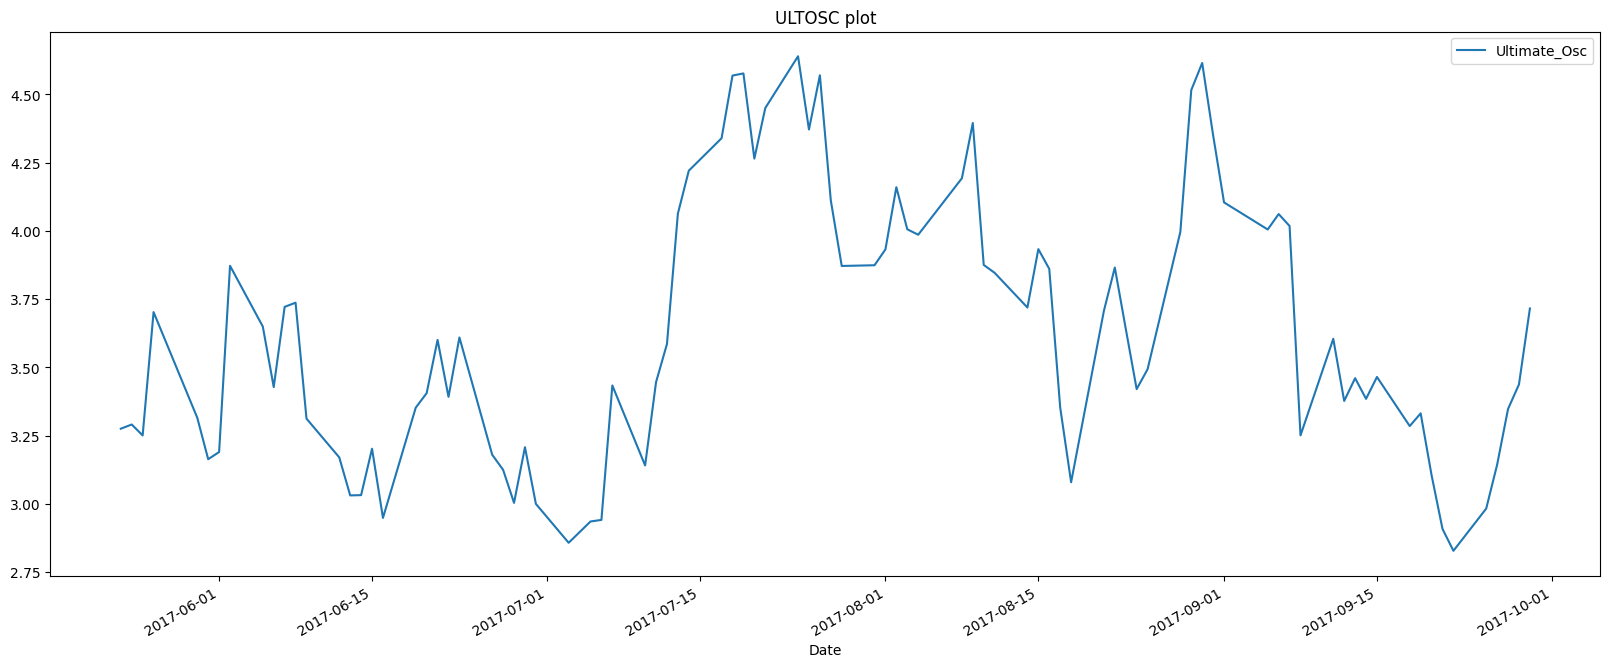

In [36]:
# Printing the Ultimate Oscillator
print("ULTIMATE OSCILLATOR")
stock_ultsoc_df = ULTOSC(stock_stod_df)

print(tabulate(stock_ultsoc_df[['Close', 'Ultimate_Osc']].tail(10), headers='keys', tablefmt='psql'))
plot_series(stock_ultsoc_df, ['Ultimate_Osc'], 90, 'ULTOSC plot')


In [37]:
# data = quandl.get_table('MER/F1', paginate=True)
# for index, row in symbol_df.iterrows():
#    print row['Symbol']
#    data = quandl.get_table('ZACKS/FC', ticker = row['Symbol'])
#    print(data)

# This API call returns 250 columns
fund_df = quandl.get_table('ZACKS/FC', ticker='AAPL')
fund_df2 = quandl.get_table('ZACKS/CP', ticker='AAPL')

In [38]:
fund_df.info()
fund_df.columns
# print tabulate(fund_df.tail(10), headers='keys', tablefmt='psql')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 249 entries, m_ticker to eps_diluted_net
dtypes: datetime64[ns](7), float64(106), int64(10), object(126)
memory usage: 9.9+ KB


Index(['m_ticker', 'ticker', 'comp_name', 'comp_name_2', 'exchange',
       'currency_code', 'per_end_date', 'per_type', 'per_code',
       'per_fisc_year',
       ...
       'stock_based_compsn_qd', 'cash_flow_oper_activity_qd',
       'net_change_prop_plant_equip_qd', 'comm_stock_div_paid_qd',
       'pref_stock_div_paid_qd', 'tot_comm_pref_stock_div_qd',
       'wavg_shares_out', 'wavg_shares_out_diluted', 'eps_basic_net',
       'eps_diluted_net'],
      dtype='object', length=249)

In [39]:
#Daily USA Gold Prices
print("Daily USA Gold Prices")
gold_df = quandl.get("WGC/GOLD_DAILY_USD", start_date=start, end_date=end)
print(tabulate(gold_df.tail(10), headers='keys', tablefmt='psql'))

Daily USA Gold Prices
+---------------------+---------+
| Date                |   Value |
|---------------------+---------|
| 2017-09-18 00:00:00 | 1312.1  |
| 2017-09-19 00:00:00 | 1309.6  |
| 2017-09-20 00:00:00 | 1311.3  |
| 2017-09-21 00:00:00 | 1292.1  |
| 2017-09-22 00:00:00 | 1294.8  |
| 2017-09-25 00:00:00 | 1293.3  |
| 2017-09-26 00:00:00 | 1300.05 |
| 2017-09-27 00:00:00 | 1282.55 |
| 2017-09-28 00:00:00 | 1283.35 |
| 2017-09-29 00:00:00 | 1283.1  |
+---------------------+---------+


In [40]:
#Cushing, OK WTI Spot Price FOB, Daily
print("Cushing, OK WTI Spot Price FOB, Daily")
print("US Energy Information Administration Data")
oil_df = quandl.get("EIA/PET_RWTC_D", start_date=start, end_date=end)
print(tabulate(oil_df.tail(10), headers='keys', tablefmt='psql'))

Cushing, OK WTI Spot Price FOB, Daily
US Energy Information Administration Data
+---------------------+---------+
| Date                |   Value |
|---------------------+---------|
| 2017-09-18 00:00:00 |   49.88 |
| 2017-09-19 00:00:00 |   49.54 |
| 2017-09-20 00:00:00 |   50.29 |
| 2017-09-21 00:00:00 |   50.58 |
| 2017-09-22 00:00:00 |   50.33 |
| 2017-09-25 00:00:00 |   51.85 |
| 2017-09-26 00:00:00 |   51.59 |
| 2017-09-27 00:00:00 |   52.14 |
| 2017-09-28 00:00:00 |   51.62 |
| 2017-09-29 00:00:00 |   51.67 |
+---------------------+---------+


In [41]:
#Natural Rate of Unemployment (Short Term)
print("Natural Rate of Unemployment (Short-term)")
s_uemp_df = quandl.get("FRED/NROUST", start_date=start, end_date=end)
print(tabulate(s_uemp_df.tail(10), headers='keys', tablefmt='psql'))

Natural Rate of Unemployment (Short-term)
+---------------------+---------+
| Date                |   Value |
|---------------------+---------|
| 2017-04-01 00:00:00 | 4.63363 |
| 2017-07-01 00:00:00 | 4.62458 |
| 2017-10-01 00:00:00 | 4.6166  |
+---------------------+---------+


In [42]:
#Natural Rate of Unemployment (Long Term)
print("Natural Rate of Unemployment (Long-term)")
l_uemp_df = quandl.get("FRED/NROU", start_date=start, end_date=end)
print(tabulate(l_uemp_df.tail(10), headers='keys', tablefmt='psql'))

Natural Rate of Unemployment (Long-term)
+---------------------+---------+
| Date                |   Value |
|---------------------+---------|
| 2017-04-01 00:00:00 | 4.62057 |
| 2017-07-01 00:00:00 | 4.61284 |
| 2017-10-01 00:00:00 | 4.60494 |
+---------------------+---------+


In [43]:
#Real Potential Gross Domestic Product
print("Real Potential Gross Domestic Product")
gdp_df = quandl.get("FRED/GDPPOT", start_date=start, end_date=end)
print(tabulate(gdp_df.tail(10), headers='keys', tablefmt='psql'))

Real Potential Gross Domestic Product
+---------------------+---------+
| Date                |   Value |
|---------------------+---------|
| 2017-04-01 00:00:00 | 18284.5 |
| 2017-07-01 00:00:00 | 18362   |
| 2017-10-01 00:00:00 | 18441.6 |
+---------------------+---------+
